In [26]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product as product
from scipy.linalg import expm
%matplotlib notebook

In [36]:
def scoobydoo(currState, Pjump, biStates):
    state = currState
    i = 0
    while biStates[state][1] != 0:
        if i > 5200:
            print("yikes")
        state = np.random.choice(Pjump.shape[1], p=Pjump[state, :])
        i += 1
    return biStates[state]

In [57]:
Rirs = [1/N, 10/N, 30/N, 50/N, 75/N, 100/N, 150/N, 2]
N = 100
I_0 = 5
Rsi = 2/N

distribution = np.zeros((len(Rirs), N - I_0 + 1))

for R_ind, Rir in enumerate(Rirs, 0):
    states = {(x, y) : ind for ind, (x, y) in enumerate([(x, y) for x in range(N + 1) for y in range(N + 1) if x + y <= N], 0)}
    biStates = {ind : state for state, ind in states.items()}
    
    Q = np.zeros((len(states), len(states)))

    for (x, y), ind in states.items():
        if y > 0:
            transitionTo = states[(x, y - 1)]
            Q[ind, transitionTo] = Rir * y
        if x > 0:
            transitionTo = states[(x - 1, y + 1)]
            Q[ind, transitionTo] = Rsi * y * x
        Q[ind, ind] = - np.sum(Q[ind, :])
    
    Pjump = Q / (- np.diagonal(Q))[:, np.newaxis]
    np.fill_diagonal(Pjump, 0)
    np.nan_to_num(Pjump, copy=False)
    
    trials = int(5e4)
    infected = [0 for i in range(N - I_0 + 1)]

    for trial in range(trials):
        endState = scoobydoo(states[(N - I_0, I_0)], Pjump, biStates)
        suscepInfected = (N - I_0) - endState[0]
        infected[suscepInfected] += 1
    
    distribution[R_ind, :] = np.asarray([i/trials for i in infected])

C:\Users\Aviral\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


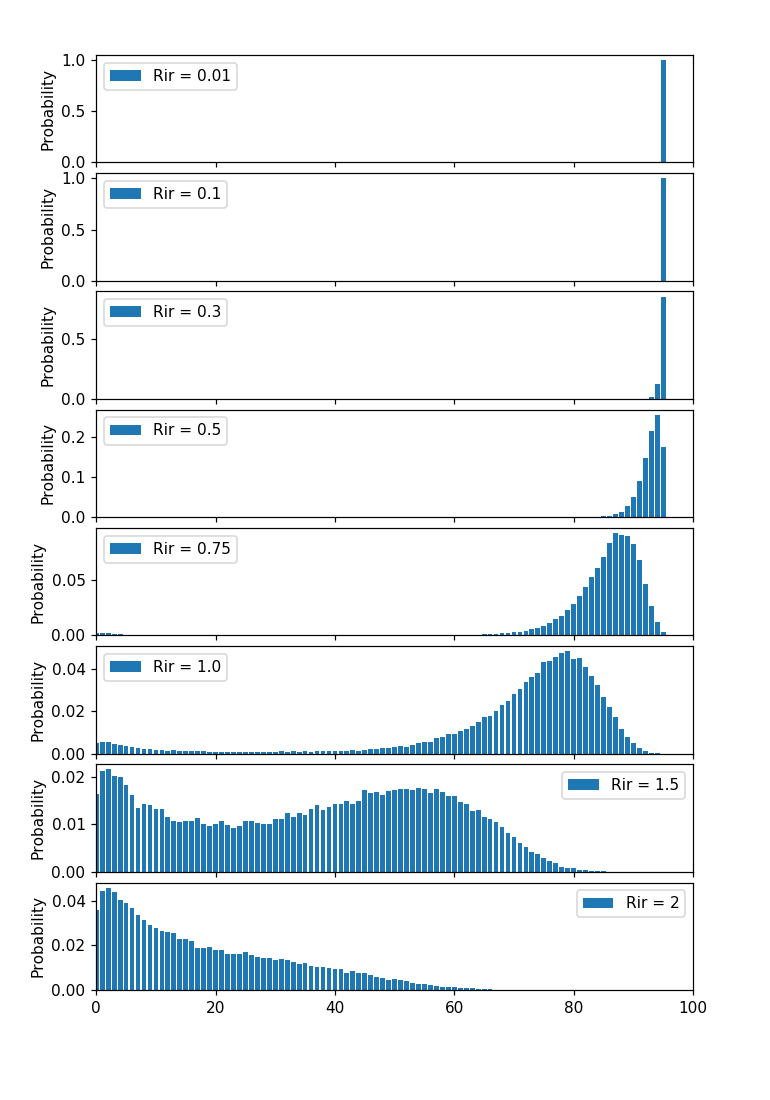

In [58]:
fig, ax = plt.subplots(nrows=len(Rirs), sharex=True, figsize=(7,10))

for i, Rir in enumerate(Rirs, 0):
    ax[i].bar(range(len(infected)), distribution[i, :], label="Rir = {}".format(Rirs[i]))
    if x == 4:
        ax[i].set_xlabel("Number infected")
    ax[i].set_ylabel("Probability")
    ax[i].set_xlim((0, 100))
    ax[i].legend()

plt.subplots_adjust(top=0.95, bottom=0.1, hspace=0.1)